## Project 3 : Let's talk lobbying: Who are the most active EU lobbyists [and other interesting finds]

### [LobbyFacts](https://lobbyfacts.eu)  is a one-stop-shop of data on EU lobbying in Brussels. Using data drawn, in real time, from the official EU lobby transparency register and the Commission’s published lists of its high-level lobby meetings, LobbyFacts brings together data on lobby spend and turnover; numbers of lobbyists and European Parliament pass-holders; high-level Commission meetings held; country of origin; issues lobbied on; and other info. It offers an extensive dataset on lobbying in the EU, along with a real-time updating [API](http://api.lobbyfacts.eu/docs/api).

In [13]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 
import re
from cycler import cycler


In [14]:
plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.facecolor'    : '#FDF6E3',
    'patch.antialiased'   : True,
    'lines.linewidth'     : 2.0,
    'lines.solid_capstyle': 'butt',
    'font.family': 'sans-serif',
    'font.style' : 'normal',
    'font.weight': 'medium',
    'axes.titlesize'      : 'large' , 
    'axes.titleweight'      : 'bold' , 
    'axes.titlepad'       : 32    ,
    'axes.labelsize'      : 12,
    'axes.labelcolor'     : '#657b83',
    'axes.facecolor'      : '#eee8d5',
    'axes.edgecolor'      : '#eee8d5',
    'axes.axisbelow'      : True,
    'axes.prop_cycle'    : cycler('color', ['#749abd', '#c6d3df', '#859900', '#9ea1a3', '#3e5569', '#eff5fb', '#268bd2', '#6c71c4']),
    'axes.grid'           : True,
    'grid.color'          : '#fdf6e3',   
    'grid.linestyle'      : '-',         
    'grid.linewidth'      : 1.5,         
    'xtick.color'         : '#657b83',
    'xtick.direction'     : 'out',
    'ytick.color'         : '#657b83',
    'ytick.direction'     : 'out',
    'text.color'          : '#657b83',
})

In [15]:
df=pd.read_csv("lby.csv")
df.head()

,organisation name,country head office,lobbying costs,EP passes,lobbyists (FTE),# of meetings,registered date
0,Federazione Italiana Giuoco Calcio,Italy,144306566,0,1.0,0,2017-08-04
1,Fundación Internacional y para Iberoamérica de...,Spain,34777770,0,5.0,1,2012-03-01
2,Business and Strategies in Europe,Belgium,19724690,0,5.0,0,2017-02-01
3,Svenska kyrkan,Sweden,13087511,0,0.5,0,2016-12-07
4,European Chemical Industry Council,Belgium,12300000,29,47.0,71,2009-09-24


In [16]:
df.columns = [c.replace(' ', '_') for c in df.columns]

## 1. Who are the most active lobbyists? 

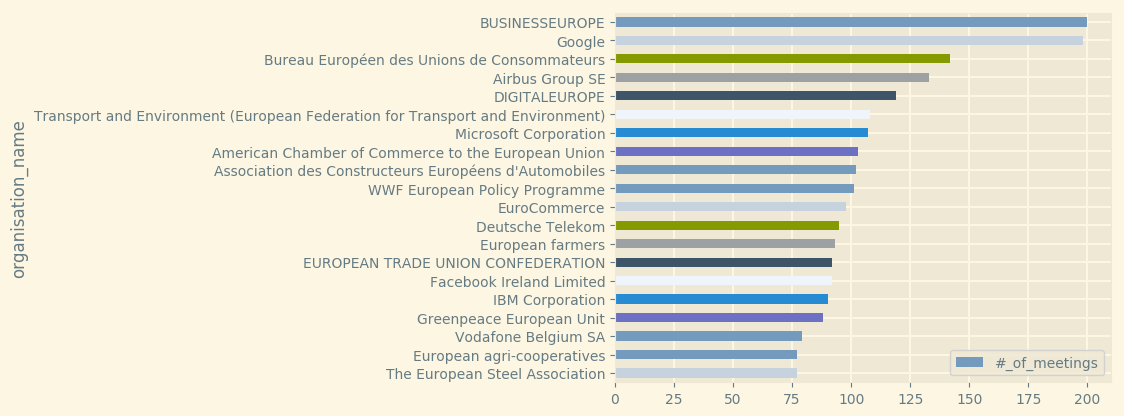

In [17]:
active = df.sort_values(by='#_of_meetings', ascending=False).head(20)
active.plot(x='organisation_name', y='#_of_meetings', kind='barh')
plt.gca().invert_yaxis()
plt.show()

## 2. Who are the big spenders? 

In [18]:
df.lobbying_costs = df.lobbying_costs.astype(str)
df1 = df[~df.lobbying_costs.str.contains("< 9,999")]

In [19]:
df2 = df1[['organisation_name','lobbying_costs']]

In [36]:
df2.astype(object)
x = df2.head(20)
x

,organisation_name,lobbying_costs
0,Federazione Italiana Giuoco Calcio,144306566
1,Fundación Internacional y para Iberoamérica de...,34777770
2,Business and Strategies in Europe,19724690
3,Svenska kyrkan,13087511
4,European Chemical Industry Council,12300000
5,Deutsches Institut für Wirtschaftsforschung,"> 10,000,000"
6,SMartCoop,"> 10,000,000"
7,JA Europe,8000000 - 8249999
8,Human Rights Project Management (former Otkryt...,7963657
9,European Council on Foreign Relations,6750000 - 6999999
